In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('Compiled_descriptors.csv')

In [3]:
df=df.iloc[:,1:]

In [4]:
df.columns[:-1]

Index(['MW', 'AMW', 'Sv', 'Mv', 'Me', 'Mp', 'Mi', 'GD', 'nTA', 'nBM',
       ...
       'ALOGP2', 'PDI', 'BLTF96', 'DLS_02', 'DLS_03', 'DLS_04', 'DLS_06',
       'DLS_cons', 'LLS_01', 'LLS_02'],
      dtype='object', length=737)

In [5]:
df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class
0,359.4,8.357,28.24,0.657,1.034,0.658,1.123,0.083,7.0,15.0,...,0.845,-2.11,0.83,0.83,0.7,0.67,0.61,0.17,0.88,0
1,368.4,7.839,30.56,0.650,1.017,0.667,1.115,0.080,6.0,16.0,...,0.880,-2.87,1.00,1.00,0.6,1.00,0.80,0.33,1.00,1
2,370.5,6.501,33.76,0.592,0.992,0.636,1.124,0.080,8.0,10.0,...,0.886,-5.32,0.83,1.00,1.0,1.00,0.94,0.17,0.88,2
3,249.3,7.334,22.23,0.654,0.988,0.694,1.117,0.123,0.0,17.0,...,1.018,-4.72,1.00,1.00,0.6,1.00,0.87,0.67,1.00,2
4,269.8,8.702,21.53,0.694,1.002,0.732,1.113,0.123,1.0,17.0,...,1.023,-4.95,1.00,1.00,0.6,1.00,0.76,0.83,1.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,304.3,8.949,23.16,0.681,1.047,0.669,1.116,0.104,6.0,13.0,...,0.841,-1.32,1.00,1.00,0.4,1.00,0.77,0.33,1.00,2
565,365.6,7.947,30.42,0.661,0.984,0.729,1.104,0.093,2.0,15.0,...,1.023,-4.75,1.00,1.00,0.8,1.00,0.90,0.33,1.00,1
566,265.4,6.805,24.28,0.623,0.984,0.669,1.123,0.116,4.0,16.0,...,1.000,-3.84,1.00,1.00,0.8,1.00,0.90,1.00,1.00,0
567,292.3,8.119,21.45,0.596,1.056,0.583,1.155,0.100,8.0,4.0,...,0.769,-0.24,0.67,0.83,0.9,0.67,0.72,0.33,0.75,2


In [6]:
x=df.drop('Class',axis=1)
y=df['Class']

In [216]:
scalar= MinMaxScaler((0,4))
scaled_data=scalar.fit_transform(x,y)

In [217]:
new_df=pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [218]:
new_df['Class']=df['Class']

In [219]:
new_df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class
0,0.677126,0.952229,0.855758,3.272727,2.188679,1.191977,1.720930,1.095652,1.555556,1.304348,...,3.020554,2.344828,3.32,2.985075,2.666667,2.409639,2.120482,0.68,3.238095,0
1,0.702916,0.768931,0.926061,3.237858,1.547170,1.295129,1.348837,1.043478,1.333333,1.391304,...,3.145666,1.956577,4.00,4.000000,2.222222,4.000000,3.036145,1.32,4.000000,1
2,0.708933,0.295471,1.023030,2.948941,0.603774,0.939828,1.767442,1.043478,1.777778,0.869565,...,3.167113,0.704981,3.32,4.000000,4.000000,4.000000,3.710843,0.68,3.238095,2
3,0.361630,0.590234,0.673636,3.257783,0.452830,1.604585,1.441860,1.791304,0.000000,1.478261,...,3.638963,1.011494,4.00,4.000000,2.222222,4.000000,3.373494,2.68,4.000000,2
4,0.420374,1.074310,0.652424,3.457036,0.981132,2.040115,1.255814,1.791304,0.222222,1.478261,...,3.656836,0.893997,4.00,4.000000,2.222222,4.000000,2.843373,3.32,4.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.519235,1.161713,0.701818,3.392279,2.679245,1.318052,1.395349,1.460870,1.333333,1.130435,...,3.006256,2.748404,4.00,4.000000,1.333333,4.000000,2.891566,1.32,4.000000,2
565,0.694892,0.807148,0.921818,3.292653,0.301887,2.005731,0.837209,1.269565,0.444444,1.304348,...,3.656836,0.996169,4.00,4.000000,3.111111,4.000000,3.518072,1.32,4.000000,1
566,0.407766,0.403043,0.735758,3.103362,0.301887,1.318052,1.720930,1.669565,0.888889,1.391304,...,3.574620,1.461047,4.00,4.000000,3.111111,4.000000,3.518072,4.00,4.000000,0
567,0.484848,0.868011,0.650000,2.968867,3.018868,0.332378,3.209302,1.391304,1.777778,0.347826,...,2.748883,3.300128,2.68,2.985075,3.555556,2.409639,2.650602,1.32,2.412698,2


In [11]:
x_trf=new_df.drop('Class',axis=1)
y_trf=new_df['Class']

In [12]:
k=30
features_chi2=SelectKBest(chi2, k=k)
x_new=features_chi2.fit_transform(x_trf,y_trf)
selected_features=df.columns[:-1][features_chi2.get_support()]

In [13]:
print(selected_features.to_list())
final_df=df[selected_features.to_list()]

['nF', 'nX', 'P_VSA_ppp_hal', 'SM03_EA(dm)', 'nR=Cs', 'nR=Ct', 'C-005', 'C-006', 'C-016', 'H-053', 'O-060', 'SdsCH', 'CATS2D_04_DD', 'CATS2D_04_DA', 'CATS2D_05_DA', 'CATS2D_07_DL', 'CATS2D_03_PL', 'T(O..F)', 'T(F..F)', 'F03[C-S]', 'F04[N-Cl]', 'F05[C-S]', 'F05[N-N]', 'F05[N-F]', 'F06[C-F]', 'F07[C-F]', 'F07[C-Br]', 'F09[C-F]', 'F09[N-F]', 'F10[C-F]']


In [14]:
final_df['Class']=df['Class']
m=final_df.columns.to_list()

C:\Users\Akshat\AppData\Local\Temp\ipykernel_7032\3084608001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Class']=df['Class']


In [15]:
x_final=new_df.drop("Class",axis=1)
y_final=new_df['Class']

In [16]:
abs(new_df.corr(method='spearman')['Class']).sort_values(ascending=False).head(10)

Class            1.000000
C-005            0.311539
VE3sign_D/Dt     0.293905
CATS2D_04_DA     0.293005
C-016            0.272676
MATS2p           0.268890
P_VSA_e_2        0.248003
SdsCH            0.246290
VE3sign_Dz(p)    0.246287
P_VSA_i_2        0.239823
Name: Class, dtype: float64

In [17]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
clf1=RandomForestClassifier()
clf2=LogisticRegression()
clf3=GradientBoostingClassifier()

In [19]:
voting_clf_hard = VotingClassifier(
    estimators=[
        ('RF', clf1),  # Include the first classifier (Logistic Regression)
          # Include the second classifier (Random Forest)
        ('GBC', clf3),  # Include the third classifier (Naive Bayes)
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
) 

In [20]:
len(m)

31

In [21]:
new_df[final_df.columns.to_list()]

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F],Class
0,0.0,0.000000,0.0,16.274261,13.333333,0.000000,0.000000,0.000000,13.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.000000,40.000000,0.000000,13.333333,0.000000,33.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.000000,0.0,0.000000,26.666667,13.333333,0.000000,0.000000,26.666667,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.666667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,6.666667,10.0,0.000000,0.000000,0.000000,0.000000,2.666667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
565,0.0,0.000000,0.0,5.877018,20.000000,0.000000,0.000000,5.333333,20.000000,0.0,...,7.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
566,0.0,0.000000,0.0,4.135679,0.000000,0.000000,26.666667,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
567,0.0,0.000000,0.0,25.887901,0.000000,0.000000,0.000000,16.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [22]:
one_df=df[m]

In [23]:
one_df

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F],Class
0,0.0,0.0,0.00,2.243,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.00,0.000,6.0,0.0,2.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.00,0.000,4.0,2.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.00,0.000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,1.0,39.15,0.000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
565,0.0,0.0,0.00,0.810,3.0,0.0,0.0,2.0,3.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
566,0.0,0.0,0.00,0.570,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
567,0.0,0.0,0.00,3.568,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [24]:
x_trf=one_df.drop('Class',axis=1)
y_trf=one_df['Class']

In [72]:
chi2_values, p_values = chi2(new_df.drop('Class', axis=1), new_df['Class'])

In [75]:
chi2_df = pd.DataFrame({
    'Feature': new_df.drop('Class', axis=1).columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
})


In [76]:
k=chi2_df['Chi2 Value'].sort_values(ascending=False).head(20).index.to_list()

In [77]:
chi2_df['Chi2 Value'].sort_values(ascending=False).head(20)


632    1265.638317
638    1109.893039
676     794.647536
512     706.380707
515     619.026720
714     588.376823
566     491.471808
16      469.904270
685     458.150401
565     447.481331
20      428.420079
513     368.076995
534     362.638143
662     339.807643
558     337.133816
526     334.519308
502     296.616365
687     290.227729
652     284.187571
503     277.262714
Name: Chi2 Value, dtype: float64

In [116]:
mask1=chi2_df['P-Value']<=0.00003
mask2=chi2_df['Chi2 Value']>=200

In [117]:
j=chi2_df[mask1&mask2]['Feature'].tolist()

In [118]:
len(j)

30

In [119]:
j

['nF',
 'nX',
 'P_VSA_ppp_hal',
 'SM03_EA(dm)',
 'nR=Cs',
 'nR=Ct',
 'C-005',
 'C-006',
 'C-016',
 'H-053',
 'O-060',
 'SdsCH',
 'CATS2D_04_DD',
 'CATS2D_04_DA',
 'CATS2D_05_DA',
 'CATS2D_07_DL',
 'CATS2D_03_PL',
 'T(O..F)',
 'T(F..F)',
 'F03[C-S]',
 'F04[N-Cl]',
 'F05[C-S]',
 'F05[N-N]',
 'F05[N-F]',
 'F06[C-F]',
 'F07[C-F]',
 'F07[C-Br]',
 'F09[C-F]',
 'F09[N-F]',
 'F10[C-F]']

In [120]:
x_trf

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F04[N-Cl],F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F]
0,0.0,0.0,0.00,2.243,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.000,6.0,0.0,2.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.000,4.0,2.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,39.15,0.000,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,0.00,0.810,3.0,0.0,0.0,2.0,3.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,0.0,0.0,0.00,0.570,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,0.0,0.0,0.00,3.568,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
final_df

,AMW,Me,nTA,RBN,RBF,nDB,nN,nF,nCL,nHM,...,F10[C-F],F10[C-Cl],F10[N-O],F10[N-F],F10[O-O],F10[O-S],MLOGP2,ALOGP,ALOGP2,Class
0,9.522293,21.886792,15.555556,7.272727,17.324841,9.230769,2.105263,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.733540,11.796117,0.820523,0
1,7.689314,15.471698,13.333333,8.484848,18.598726,12.307692,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,3.121906,14.842811,2.223976,1
2,2.954706,6.037736,17.777778,8.484848,15.414013,12.307692,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.974403,21.324549,7.490873,2
3,5.902335,4.528302,0.000000,4.848485,14.140127,0.000000,6.315789,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.747006,15.499307,2.616675,2
4,10.743100,9.811321,2.222222,3.636364,11.592357,0.000000,6.315789,0.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.973275,16.733703,3.439566,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,11.617127,26.792453,13.333333,1.212121,3.566879,3.076923,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.006156,10.515488,0.435126,2
565,8.071479,3.018868,4.444444,4.848485,10.445860,9.230769,4.210526,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.003488,7.082755,0.000000,1
566,4.030432,3.018868,8.888889,2.424242,6.242038,0.000000,6.315789,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.524456,15.584836,2.667982,0
567,8.680113,30.188679,17.777778,13.333333,40.000000,12.307692,4.210526,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.891816,5.087841,0.147015,2


In [122]:
m=[ele for ele in final_df.columns.isin(x_trf.columns)]
m

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

In [123]:
k=chi2_df[mask1&mask2]['Feature'].to_list()

In [124]:
final_df=new_df[j]

In [125]:
final_df['Class']=new_df['Class']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_7032\695168134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Class']=new_df['Class']


In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
final_df

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F],Class
0,0.0,0.000000,0.0,16.274261,13.333333,0.000000,0.000000,0.000000,13.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.000000,40.000000,0.000000,13.333333,0.000000,33.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.000000,0.0,0.000000,26.666667,13.333333,0.000000,0.000000,26.666667,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.666667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,6.666667,10.0,0.000000,0.000000,0.000000,0.000000,2.666667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
565,0.0,0.000000,0.0,5.877018,20.000000,0.000000,0.000000,5.333333,20.000000,0.0,...,7.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
566,0.0,0.000000,0.0,4.135679,0.000000,0.000000,26.666667,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
567,0.0,0.000000,0.0,25.887901,0.000000,0.000000,0.000000,16.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [128]:
x_train_trf= final_df.drop('Class', axis=1)
y_train_trf=final_df['Class']

In [129]:
clf1=RandomForestClassifier(n_estimators=1000)


In [130]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [132]:
lst=[]

In [133]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


In [138]:
lst.append(np.mean(cross_val_score(clf1,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

In [139]:
lst

[0.7167797888386124]

In [150]:
lst=[]

In [178]:
cw={}
clf1=RandomForestClassifier(n_estimators=1000, n_jobs=1, bootstrap=False, max_depth=70)
clf2=GradientBoostingClassifier(n_estimators=500)
clf3=LogisticRegression(max_iter=4500)
clf4=AdaBoostClassifier(n_estimators=500)
clf5=SVC(probability = True, max_iter = 2000, class_weight = cw)
clf6=KNeighborsClassifier(n_neighbors=20)

In [152]:
lst.append(np.mean(cross_val_score(clf1,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf2,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf3,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf4,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf5,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf6,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

In [153]:
lst

[0.7128205128205128,
 0.695211161387632,
 0.6484539969834089,
 0.5429110105580693,
 0.6796757164404224,
 0.6328431372549019]

In [163]:
voting_clf_hard=VotingClassifier(estimators=[('RF', clf1), ('GCB',clf2), ('LR', clf3), ('SVC', clf5)], voting='hard')

In [221]:
x_train_trf,x_test_trf,y_train_trf,y_test_trf=train_test_split(new_df.drop('Class',axis=1),new_df['Class'],random_state=42,test_size=0.1)

In [154]:
clf1.fit(x_train_trf,y_train_trf)
y_pred=clf1.predict(x_test_trf)

In [ ]:
clf2=RandomForestClassifier()

In [155]:
accuracy_score(y_pred,y_test_trf)

0.6842105263157895

In [186]:
np.mean(cross_val_score(clf1,x_train_trf,y_train_trf,cv=10,scoring='accuracy'))

0.7246983408748114

In [193]:
abs(new_df.rank().corr()["Class"]).sort_values(ascending=False).head(30)

Class             1.000000
C-005             0.311539
VE3sign_D/Dt      0.293905
CATS2D_04_DA      0.293005
C-016             0.272676
MATS2p            0.268890
P_VSA_e_2         0.248003
SdsCH             0.246290
VE3sign_Dz(p)     0.246287
P_VSA_i_2         0.239823
P_VSA_s_4         0.238245
F03[N-N]          0.233445
P_VSA_v_3         0.232697
MCD               0.231931
GATS2p            0.231268
Chi1_EA(dm)       0.229526
GATS2i            0.228884
VE3sign_Dt        0.227658
CATS2D_08_DA      0.226876
SssCH2            0.226765
MATS2i            0.225942
P_VSA_LogP_1      0.224056
O-060             0.223022
CATS2D_04_DD      0.222797
nCsp2             0.220959
Eig02_EA(dm)      0.215890
SpDiam_AEA(bo)    0.214969
VE3sign_Dz(v)     0.209434
VE3sign_Dz(Z)     0.209266
LOC               0.208137
Name: Class, dtype: float64

In [209]:
trying_df=new_df[abs(new_df.corr()["Class"]).sort_values(ascending=False).head(30).index.to_list()]

SyntaxError: invalid syntax (1112947670.py, line 1)

In [210]:
trying_df

,Class,C-005,VE3sign_D/Dt,CATS2D_04_DA,C-016,MATS2p,P_VSA_e_2,SdsCH,VE3sign_Dz(p),P_VSA_i_2,...,MATS2i,P_VSA_LogP_1,O-060,CATS2D_04_DD,nCsp2,Eig02_EA(dm),SpDiam_AEA(bo),VE3sign_Dz(v),VE3sign_Dz(Z),LOC
0,0,21316.00,132.25,14161.00,129240.25,576.00,2970.25,307.5,75.5,58.5,...,37.5,94.0,113.5,194.0,250.5,443.0,98.0,111.5,134.5,385.5
1,1,205209.00,267806.25,97032.25,319225.00,134322.25,122500.00,527.0,13.0,361.0,...,311.5,432.0,449.0,194.0,380.5,280.5,19.0,28.0,33.0,445.0
2,2,21316.00,198916.00,251502.25,271441.00,143641.00,53130.25,560.0,347.0,232.5,...,333.0,552.0,303.0,453.5,67.0,453.0,405.0,424.0,462.0,555.0
3,2,21316.00,188356.00,97032.25,14042.25,9604.00,24025.00,116.5,386.0,152.0,...,314.0,94.0,113.5,194.0,135.5,49.5,270.0,408.0,437.0,5.0
4,2,21316.00,145542.25,97032.25,14042.25,1332.25,10609.00,116.5,402.0,99.0,...,291.0,94.0,113.5,194.0,135.5,49.5,256.0,428.0,456.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2,21316.00,39402.25,277729.00,14042.25,3080.25,196.00,116.5,168.5,15.0,...,61.5,94.0,303.0,453.5,67.0,453.0,405.0,255.0,323.0,226.5
565,1,21316.00,267806.25,14161.00,203401.00,160000.00,266256.00,521.0,126.0,301.0,...,163.0,374.0,113.5,194.0,295.0,546.5,295.5,103.0,80.5,273.5
566,0,298662.25,267806.25,14161.00,14042.25,321489.00,34782.25,116.5,521.0,185.5,...,545.0,506.5,113.5,194.0,67.0,186.5,169.0,517.5,521.0,475.0
567,2,21316.00,267806.25,14161.00,14042.25,4624.00,9.00,116.5,521.0,3.0,...,86.5,94.0,113.5,194.0,4.0,537.0,2.0,517.5,521.0,553.0


In [211]:
for i in range(0,7):
    trying_df.iloc[:,i]=trying_df.iloc[:, i]**2

In [212]:
trying_df['Class']=df['Class']

In [213]:
x_train_trying,x_test_trying,y_train_trying,y_test_trying=train_test_split(trying_df.drop('Class',axis=1),trying_df['Class'], random_state=42,test_size=0.2)

In [225]:
np.mean(cross_val_score(clf1,x_train_trying.rank(),y_train_trying,cv=10,scoring='accuracy'))

0.6881642512077295

In [179]:
x_test_trf

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F04[N-Cl],F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F]
204,250.5,223.0,223.0,127.0,474.5,268.0,453.0,123.5,359.5,252.0,...,274.0,266.0,233.0,273.0,252.5,260.0,276.5,257.0,273.0,255.5
70,250.5,223.0,223.0,127.0,327.5,268.0,342.5,123.5,359.5,252.0,...,274.0,266.0,233.0,273.0,252.5,260.0,276.5,257.0,273.0,255.5
131,527.5,519.0,466.5,480.5,474.5,268.0,146.0,551.0,359.5,566.5,...,274.0,266.0,487.5,273.0,528.0,532.5,276.5,527.5,273.0,255.5
431,250.5,223.0,223.0,343.5,115.5,268.0,453.0,551.0,118.5,552.0,...,274.0,266.0,233.0,273.0,252.5,260.0,276.5,257.0,273.0,255.5
540,250.5,223.0,223.0,461.0,115.5,268.0,146.0,507.0,118.5,252.0,...,274.0,266.0,233.0,273.0,252.5,260.0,276.5,257.0,273.0,255.5
567,250.5,223.0,223.0,526.0,115.5,268.0,146.0,524.5,118.5,252.0,...,274.0,266.0,233.0,273.0,252.5,260.0,276.5,257.0,273.0,255.5
369,250.5,477.5,533.0,127.0,474.5,268.0,146.0,123.5,521.0,252.0,...,274.0,266.0,233.0,273.0,252.5,260.0,276.5,257.0,273.0,255.5
29,250.5,477.5,485.5,127.0,115.5,268.0,146.0,123.5,118.5,252.0,...,274.0,534.0,233.0,273.0,252.5,260.0,276.5,257.0,273.0,255.5
81,250.5,223.0,223.0,343.5,241.0,268.0,146.0,551.0,265.5,552.0,...,274.0,266.0,233.0,273.0,252.5,260.0,276.5,257.0,273.0,255.5
477,511.5,477.5,453.5,412.0,115.5,268.0,146.0,309.0,118.5,252.0,...,274.0,266.0,532.5,552.5,514.5,260.0,276.5,527.5,273.0,530.5


In [102]:
x_df=pd.concat([x_train_trf,x_test_trf],axis=0)

In [103]:
y_df=new_df['Class']

In [104]:
the_df=pd.concat([x_df,y_df],axis=1)

In [105]:
the_df.to_csv('for_regression1.csv')

In [106]:
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [298]:
classification_report(y_pred,y_test_trf)

'              precision    recall  f1-score   support\n\n           0       0.50      0.57      0.53        14\n           1       0.47      0.54      0.50        13\n           2       0.96      0.83      0.89        30\n\n    accuracy                           0.70        57\n   macro avg       0.64      0.65      0.64        57\nweighted avg       0.74      0.70      0.71        57\n'

In [277]:
confusion_matrix(y_test_trf,y_pred)

array([[ 8,  5,  2],
       [ 4,  3,  7],
       [ 3,  5, 20]], dtype=int64)

In [111]:
matthews_corrcoef(y_test_trf,y_pred)

0.47846978638064225

In [101]:
lst.append(np.mean(cross_val_score(voting_clf_hard,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [94]:
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [110]:
plotting_df=pd.DataFrame(columns=['Mod','Accuracy'])

In [111]:
plotting_df['Mod']=['RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','AdaBoostClassifier','SVC', 'KNN', '60_mod_ens', '60_rf', 'tuned_lR']

In [112]:
plotting_df['Accuracy']=lst

In [113]:
plotting_df

,Mod,Accuracy
0,RandomForestClassifier,0.822436
1,GradientBoostingClassifier,1.000000
2,LogisticRegression,0.654299
3,AdaBoostClassifier,1.000000
4,SVC,0.662179
5,KNN,0.671870
6,60_mod_ens,0.695400
7,60_rf,0.753959
8,tuned_lR,0.654299


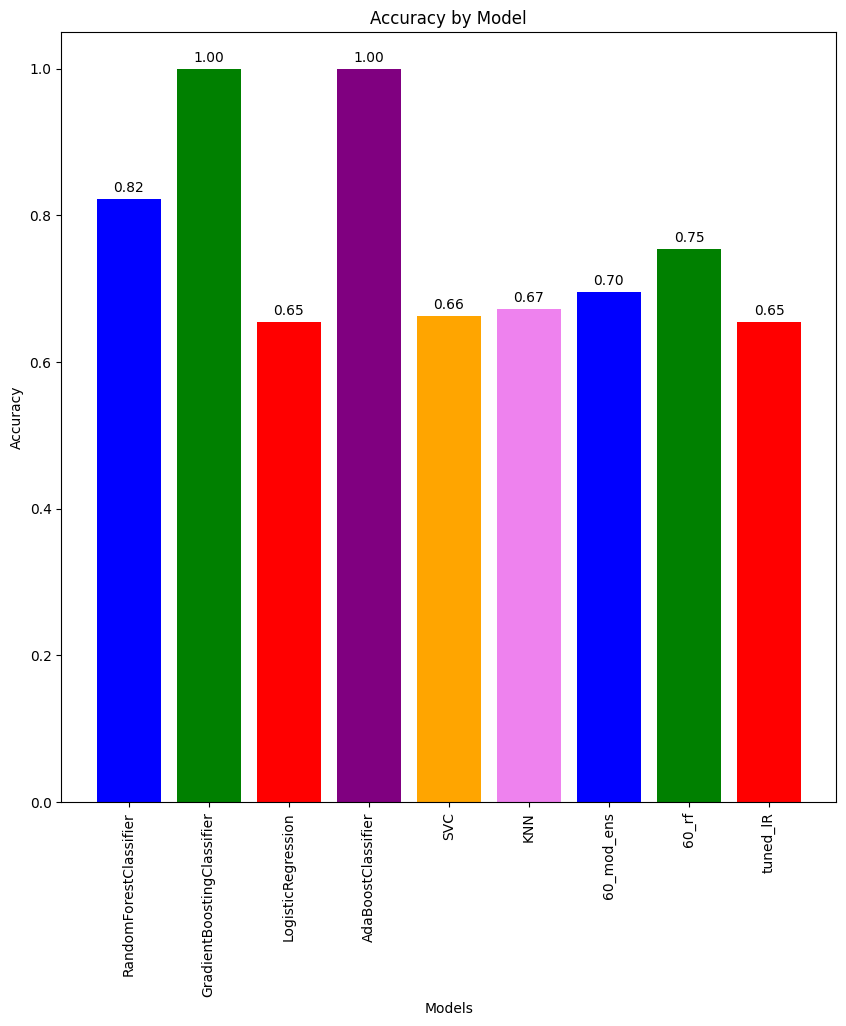

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# Assuming 'plotting' is a dictionary with 'Mod' and 'Accuracy' columns

# Define a color list
colors = ['blue', 'green', 'red', 'purple', 'orange','violet']  # Adjust colors and length as needed

# Create the bar plot with custom colors
plt.bar(x=plotting_df['Mod'], height=plotting_df['Accuracy'], color=colors[:len(plotting_df['Mod'])])

# Rotate x-axis labels (optional)
plt.xticks(rotation='vertical')  
for i, (v, label) in enumerate(zip(plotting_df['Accuracy'], plotting_df['Mod'])):
  y_pos = v + 0.01  # Adjust y position for label placement
  plt.text(i, y_pos, f"{v:.2f}", ha='center')  # Format accuracy with 2 decimal places


# Add accuracy labels using plt.text (optional)
# ... (code for adding accuracy labels remains the same)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy by Model")
plt.show()

In [261]:
from sklearn.metrics import confusion_matrix

In [100]:
voting_clf_hard = VotingClassifier(
    estimators=[
        ('SVC', clf5),  # Include the first classifier (Logistic Regression)
          # Include the second classifier (Random Forest)
        ('LR', clf3),  # Include the third classifier (Naive Bayes)
        ('KNN', clf6),
        ('RF', clf1)
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
) 

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [345]:
y_pred=clf4.predict(x_test_trf)

In [346]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test_trf)

0.5964912280701754

In [347]:
confusion_matrix(y_test_trf,y_pred)


array([[ 9,  4,  3],
       [ 4,  4,  7],
       [ 3,  2, 21]], dtype=int64)

In [348]:
pd.DataFrame(confusion_matrix(y_test_trf,y_pred))

,0,1,2
0,9,4,3
1,4,4,7
2,3,2,21


In [349]:
classification_report(y_pred, y_test_trf)

'              precision    recall  f1-score   support\n\n           0       0.56      0.56      0.56        16\n           1       0.27      0.40      0.32        10\n           2       0.81      0.68      0.74        31\n\n    accuracy                           0.60        57\n   macro avg       0.55      0.55      0.54        57\nweighted avg       0.64      0.60      0.61        57\n'